In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

from context import predicate_search
from predicate_search import PredicateData, PredicateSearch, NormData, RobustNormal, AnomalyDetection

In [42]:
class PredAnomalyDetection:
    
    def __init__(self, c=.5, b=.1, quantile=.25):
        self.c = c
        self.b = b
        self.quantile = quantile
        
    def fit(self, data):
        self.model = RobustNormal()
        self.model.fit(data)
        self.mean = self.model.mean
        self.cov = self.model.cov
        
    def search(self, data, c=None, b=None, quantile=None):
        if c is None:
            c = self.c
        if b is None:
            b = self.b
        if quantile is None:
            quantile = self.quantile
        self.predicate_data = PredicateData(data)
        disc_data = self.predicate_data.disc_data
        
        logp = st.multivariate_normal(self.mean, self.cov).logpdf(data)
        predicates = self.predicate_data.get_base_predicates(logp)
        self.predicate_search = PredicateSearch(predicates)
        predicate = self.predicate_search.search(c=c, b=b, quantile=quantile)
        return predicate_search, predicate
        
    def predict(self, data, c=None, b=None, quantile=None):
        predicate_search, predicates = self.search(data, c, b, quantile)
        predy = data.index.isin(predicates[0].selected_index).astype(int)
        return predicate_search, predicates, predy

In [54]:
norm_data = NormData(n=1000, m=2, predicate_n=5, predicate_m=2)

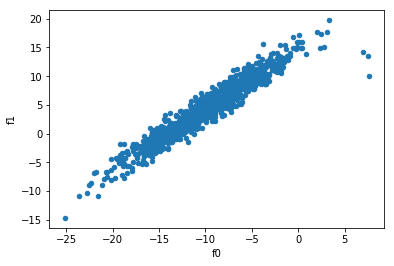

In [55]:
norm_data.tainted.plot.scatter(x='f0', y='f1')

In [56]:
data = norm_data.tainted

In [57]:
clf = PredAnomalyDetection()

In [58]:
clf.fit(data)

logp = -4,736.2, ||grad|| = 0.0041149: 100%|██████████| 42/42 [00:00<00:00, 708.66it/s]  


In [69]:
predicate_search, predicate, predy = clf.predict(data, c=.1)

In [71]:
[clf.predicate_data.disc_predicate_to_cont(p) for p in predicate][0]

[f0: [(7.626583742566027, 7.626583742566027)], f1: [(9.654097870920634, 9.973587402207702)]]

In [60]:
predicate

[[f0: [(99, 99)], f1: [(70, 70)]]]

In [ ]:
clf = AnomalyDetection()

In [ ]:
clf.fit(norm_data.tainted)

In [ ]:
disc_p, cont_p = clf.search(c=.1)

In [ ]:
cont_p

In [ ]:
disc_p

In [ ]:
# data = norm_data.tainted
# y = norm_data.y
# norm_data.predicate

In [ ]:
# norm_data.plot2d()

In [ ]:
# predicate_data = PredicateData(data)
# disc_data = predicate_data.disc_data

In [ ]:
# disc_data.plot.scatter(x='f0', y='f1')

In [ ]:
# anomaly_detection = AnomalyDetection()

In [ ]:
# anomaly_detection.fit(data)

In [ ]:
# p = anomaly_detection.search(c=.1)

In [ ]:
# p[0].get_obj()

In [ ]:
# model = RobustNormal()
# model.fit(data)

In [ ]:
# logp = model.score(data)

In [ ]:
# predicates = predicate_data.get_base_predicates(logp)
# predicate_search = PredicateSearch(predicates)

In [ ]:
# index = data[y.astype(bool)].index.tolist()

In [ ]:
# index

In [ ]:
# predicate_search.search(c=.5, index=index, maxiters=10)